# Goals:

The goals of this project is going to try to understand the kinematics of the tidal tails of the MW and M31 over time. I will also be looking at the change in morphology of the tidal tails of both MW and M31. 

# Plan:

Figure out when the tidal tails form using Lab 10 and determine which snapshot the tidal tails form.
I will then choose a tidal particle that is outside the Jacobi radius right before the MW and M31 make their first encounter. I will then follow the stars and see where they end up in the merger. 
I will use the density contour definitions to get the structure of the tidal tails.

# Questions:
 
Jacobi radius for both MW or M31?


# OUTLINE

import needed modules

Testing Ground to make sure things work

calculate the jacobi radius at different snapshots and select one.

Use selected jacobi radius and snapshot and overlay it on same plot

Accelerate some snapshot later and overlay same particles and see where they ended up.

NEXT STEPS:

Check to see Im on the right track and try to determine the structure.
    

In [26]:
#%matplotlib qt
# enabling windows to pop up and be interactive

import matplotlib.widgets as mw  # get access to the widgets


# external modules
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
%matplotlib inline
import numpy as np
import astropy.units as u

# my modules 
from ReadFile import Read
from CenterOfMass2 import CenterOfMass
from MassProfile import MassProfile

# I took the code from Lab 7 for making contours and made it into a separate script
# NOTE: it is more organized to keep functions in separate scripts 
# and then call them when you want to e.g. make plots or do some analysis. 
from contour import density_contour

# TESTING GROUND

In [9]:
# Load in disk particles centered on the MW
# this is from the HighRes data files on nimoy so it might take a bit of time to load
COMMW = CenterOfMass("MW_250.txt",2)
COMM31 = CenterOfMass('M31_250.txt',2)

In [10]:
# Compute COM of the MW at the new position using disk particles
COMPMW = COMMW.COM_P(0.1, 2)
COMVMW= COMMW.COM_V(COMPMW[0],COMPMW[1],COMPMW[2])
COMPM31 = COMM31.COM_P(0.1, 2)
COMVM31= COMM31.COM_V(COMPM31[0],COMPM31[1],COMPM31[2])
# Determine positions of disk particles relative to COM 
MW_Disk_x = COMMW.x - COMPMW[0].value 
MW_Disk_y = COMMW.y - COMPMW[1].value 
M31_Disk_x= COMM31.x - COMPMW[0].value
M31_Disk_y= COMM31.y - COMPMW[1].value
# Also store the disk velocity in the y direction
MW_Disk_vy = COMMW.vy - COMVMW[1].value
M31_Disk_vy = COMM31.vy - COMVM31[1].value

MWZ= COMMW.z - COMPMW[2].value
M31Z= COMM31.z - COMPM31[2].value

RMW = np.sqrt(COMPMW[0]**2+COMPMW[1]**2+COMPMW[2]**2)
RM31= np.sqrt(COMPM31[0]**2+COMPM31[1]**2+COMPM31[2]**2)

print(RMW)
print(RM31)
print(RM31-RMW)

161.2820318572407 kpc
319.25991386329724 kpc
157.97788200605655 kpc


In [2]:
MW=MassProfile('MW',0)
M31=MassProfile('M31',0)

In [5]:
r = np.arange(700,769,0.1)
MW_Enc=MW.MassEnclosed(2,r)
MW_Enc

<Quantity [1.0876e+10, 4.3218e+10, 5.6748e+10, 6.6338e+10, 7.1924e+10,
           7.4248e+10, 7.4940e+10, 7.4992e+10, 7.5000e+10, 7.5000e+10,
           7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10,
           7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10,
           7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10,
           7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10,
           7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10,
           7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10,
           7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10,
           7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10,
           7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10,
           7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10,
           7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10,
           7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10, 7.5000e+10,
      

In [8]:
len(MW_Enc)
MW_Enc[len(MW_Enc)-1]

<Quantity 7.5e+10 solMass>

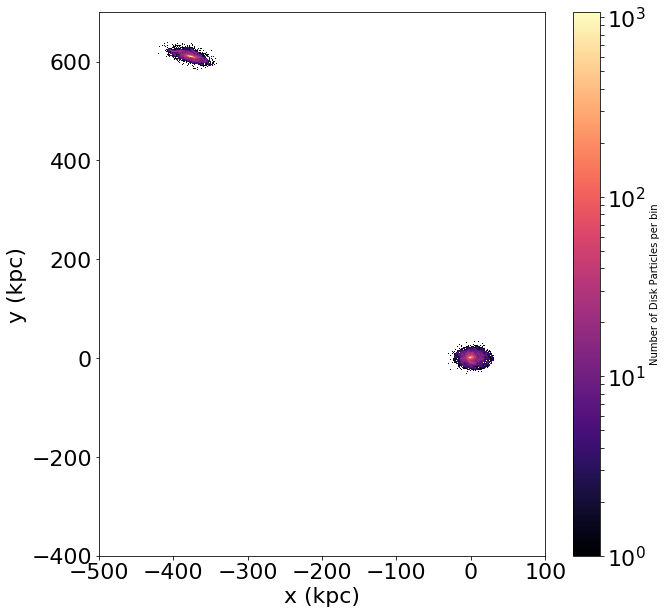

In [21]:
# Plot the disk of the MW with contours. 


# MW Disk Density 
fig, ax= plt.subplots(figsize=(10, 10))

## ADD HERE
# plot the particle density for MW using plt.hist2d 
# can modify bin number (e.g. bin =100 for low res files)

plt.hist2d(MW_Disk_x, MW_Disk_y, bins=200, norm=LogNorm(), cmap='magma')
plt.hist2d(M31_Disk_x, M31_Disk_y, bins=200, norm=LogNorm(), cmap='magma')
plt.colorbar(label='Number of Disk Particles per bin')
# note: MW_Disk.x and MW_Disk.y won't be exactly at 0,0 because i was lazy and didn't take out the center of mass pos

#### ADD HERE 
# call density_contour to add contours
# density_contour(x pos, y pos, contour res, contour res, axis, colors=[colors,colors])

#density_contour(MW_Disk_x, MW_Disk_y, 80, 80, ax=ax, colors=['white'])
#density_contour(M31_Disk_x, M31_Disk_y, 80, 80, ax=ax, colors=['white'])


# Add axis labels
plt.xlabel('x (kpc)', fontsize=22)
plt.ylabel('y (kpc)', fontsize=22)

#set axis limits
plt.ylim(-400,700)
plt.xlim(-500,100)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size



# Jacobi Radius

In [11]:
snap_ids=np.arange(0,300,10)
if len(snap_ids)==0:
    print("Ooops thats not valid")


Rj=np.arange(760,770,0.1)
# a for loop 
for i, snap_id in enumerate(snap_ids): # loop over files

    # compose the data filename (be careful about the folder)
    ilbl = '000'+ str(snap_id)
    ilbl = ilbl[-3:] #remove last three lines

    filenameMW= "%s_"%('MW') + ilbl + '.txt'
    filenameM31= "%s_"%('M31') + ilbl + '.txt'
    filenameM33= "%s_"%('M33') + ilbl + '.txt'
    
    # read data in the given file using Read
    time, total, data = Read(filenameMW)
    time, total, data = Read(filenameM31)  
    time, total, data = Read(filenameM33)  
    
    # Initialize an instance of CenterOfMass class, using disk particles

    COMMW=CenterOfMass(filenameMW,2)
    COMM31=CenterOfMass(filenameM31,2)
    #COMM33=CenterOfMass(filenameM33,2)
    
    # Compute COM of the MW at the new position using disk particles
    COMPMW = COMMW.COM_P(0.1, 2)
    COMPM31 = COMM31.COM_P(0.1, 2)
    #COMPM33 = COMM33.COM_P(0.1, 4)

    
    RMW = np.sqrt(COMPMW[0]**2+COMPMW[1]**2+COMPMW[2]**2)
    RM31= np.sqrt(COMPM31[0]**2+COMPM31[1]**2+COMPM31[2]**2)


    
    #Instance for MassProfile
    MW=MassProfile('MW',snap_id)
    M31=MassProfile('M31',snap_id)
    
    #Mass enclosed
    MW_Encl=MW.MassEnclosed(2,Rj)
    M31_Encl=M31.MassEnclosed(2,Rj)
    
    R_Dist= RM31-RMW
    
    #Jacobi
    Rj= (R_Dist * (M31_Encl/(2*MW_Encl))**(1/3)).value
    
    print(snap_id)
    print(Rj[len(Rj)-1]*u.kpc)
    print(M31_Encl[len(MW_Encl)-1])
    print(R_Dist)
    

0
713.9285727845383 kpc
120000000000.00003 solMass
769.056241705981 kpc
10
698.8854905208859 kpc
120000000000.00003 solMass
752.851572569073 kpc
20
682.8300433634777 kpc
120000000000.00003 solMass
735.5563664091259 kpc
30
666.3206066633189 kpc
120000000000.00003 solMass
717.7721148392721 kpc
40
649.3897262533563 kpc
120000000000.00003 solMass
699.5338767952699 kpc
50
633.6269700468054 kpc
120000000000.00003 solMass
682.5539624043154 kpc
60
618.2075560183993 kpc
120000000000.00003 solMass
665.9439021629343 kpc
70
603.3467689810171 kpc
120000000000.00003 solMass
649.9356046056781 kpc
80
588.5447120783247 kpc
120000000000.00003 solMass
633.9905721681848 kpc
90
573.4269574697975 kpc
120000000000.00003 solMass
617.7054646861847 kpc
100
557.83796225913 kpc
120000000000.00003 solMass
600.9127286538833 kpc
110
541.2641714403943 kpc
120000000000.00003 solMass
583.0591537112751 kpc
120
523.1508630073055 kpc
120000000000.00003 solMass
563.5471836915283 kpc
130
503.8425265251428 kpc
120000000000.0

In [8]:
snap_ids=np.arange(265,280,1)
if len(snap_ids)==0:
    print("Ooops thats not valid")


Rj=np.arange(150,158,0.1)
# a for loop 
for i, snap_id in enumerate(snap_ids): # loop over files

    # compose the data filename (be careful about the folder)
    ilbl = '000'+ str(snap_id)
    ilbl = ilbl[-3:] #remove last three lines

    filenameMW= "%s_"%('MW') + ilbl + '.txt'
    filenameM31= "%s_"%('M31') + ilbl + '.txt'
    filenameM33= "%s_"%('M33') + ilbl + '.txt'
    
    # read data in the given file using Read
    time, total, data = Read(filenameMW)
    time, total, data = Read(filenameM31)  
    time, total, data = Read(filenameM33)  
    
    # Initialize an instance of CenterOfMass class, using disk particles

    COMMW=CenterOfMass(filenameMW,2)
    COMM31=CenterOfMass(filenameM31,2)
    #COMM33=CenterOfMass(filenameM33,2)
    
    # Compute COM of the MW at the new position using disk particles
    COMPMW = COMMW.COM_P(0.1, 2)
    COMPM31 = COMM31.COM_P(0.1, 2) 
    #COMPM33 = COMM33.COM_P(0.1, 4)

    
    RMW = np.sqrt(COMPMW[0]**2+COMPMW[1]**2+COMPMW[2]**2)
    RM31= np.sqrt(COMPM31[0]**2+COMPM31[1]**2+COMPM31[2]**2)


    
     #Instance for MassProfile
    MW=MassProfile('MW',snap_id)
    M31=MassProfile('M31',snap_id)
    
    #Mass enclosed
    MW_Encl=MW.MassEnclosed(2,Rj)
    M31_Encl=M31.MassEnclosed(2,Rj)
    
    R_Dist= RM31-RMW
    
    #Jacobi
    Rj= (R_Dist * (M31_Encl/(2*MW_Encl))**(1/3)).value
    
    print(snap_id)
    print(Rj[len(Rj)-1])
    print(M31_Encl[len(MW_Encl)-1])
    print(R_Dist)
    

265
67.9663608851347
120000000000.00003 solMass
73.21454282308017 kpc
266
62.19546980240426
119994000000.00003 solMass
66.99915552376856 kpc
267
56.02711597223395
119992000000.00003 solMass
60.354722362368534 kpc
268
49.611121216435095
119988000000.00003 solMass
53.44374179747743 kpc
269
43.17049638741936
119958000000.00003 solMass
46.50943423530518 kpc
270
36.75962485258509
119866000000.00003 solMass
39.61250364702559 kpc
271
29.974113073884393
119150000000.00003 solMass
32.364945868294626 kpc
272
22.978792528883773
115994000000.00003 solMass
25.026436355885693 kpc
273
15.63323930868295
105532000000.00002 solMass
17.47179635611812 kpc
274
8.58423310579505
85670000000.00002 solMass
9.897326537541886 kpc
275
1.8819589149221294
61640000000.000015 solMass
2.2098668569832682 kpc
276
-4.244790347356952
18836000000.000008 solMass
-5.469315285679215 kpc
277
nan
0.0 solMass
-12.982900402621624 kpc
278
nan
0.0 solMass
-20.389788096586926 kpc
279
nan
0.0 solMass
-27.457663766352 kpc


# Visualization

265


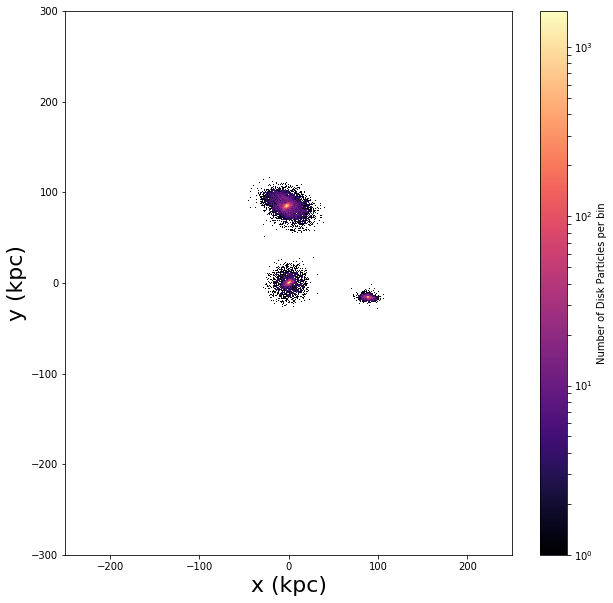

266


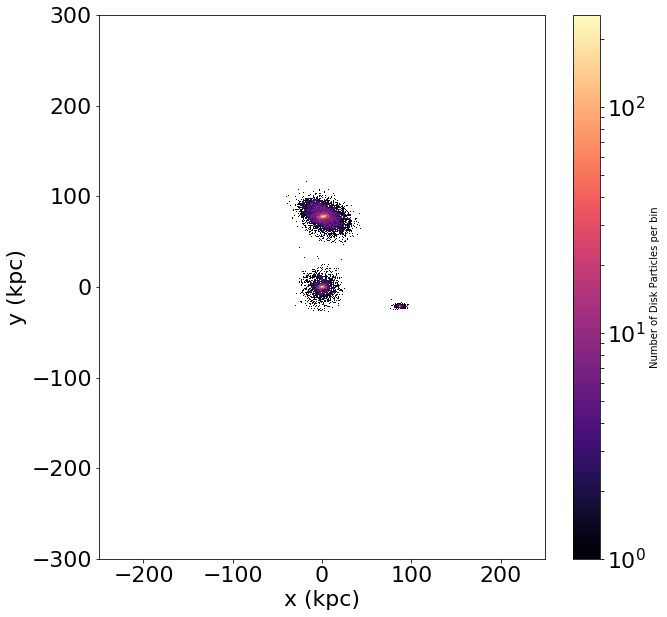

267


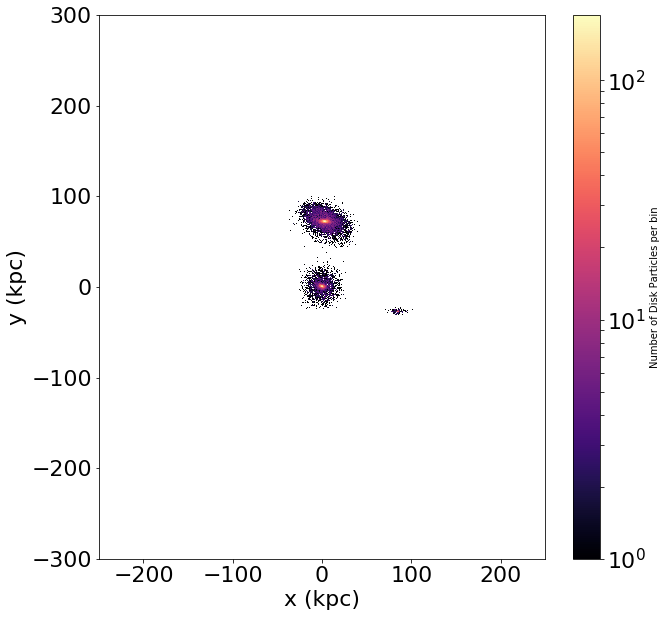

268


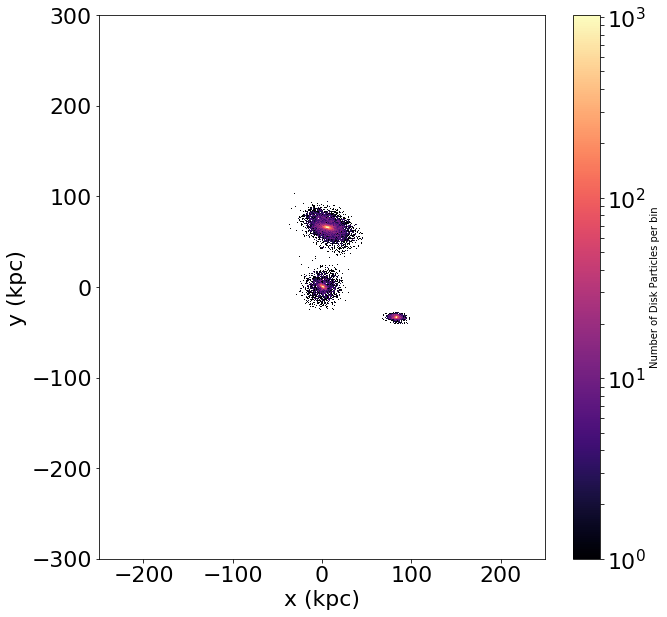

269


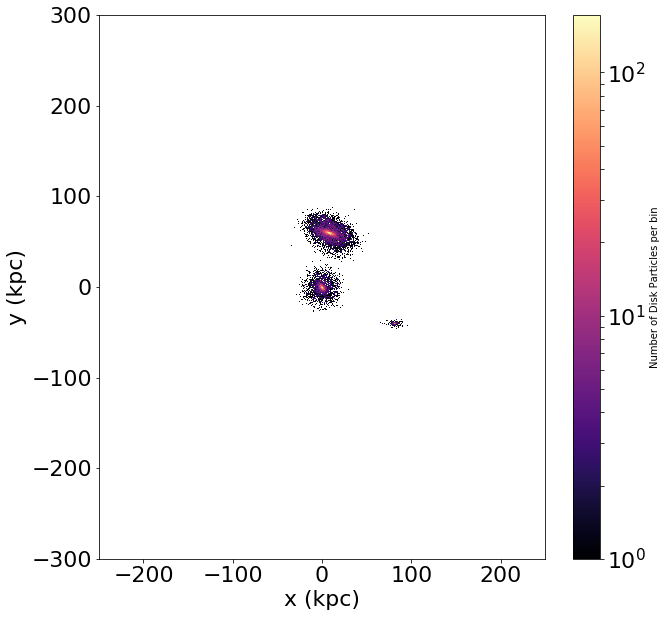

270


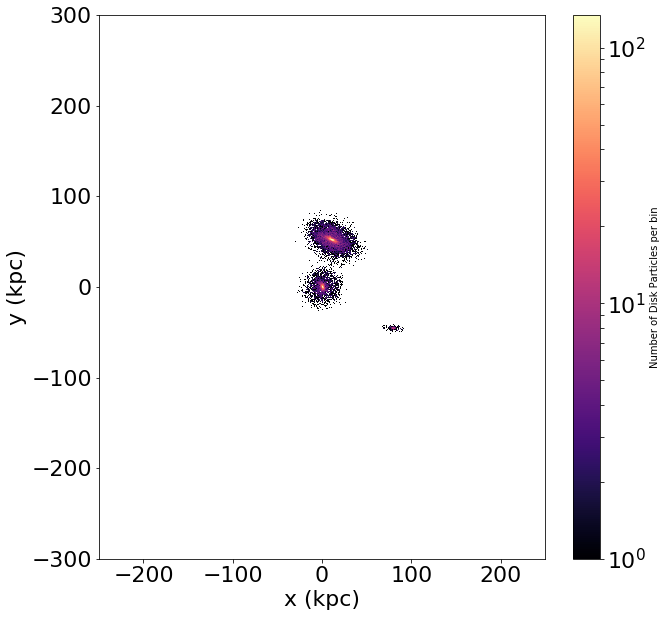

271


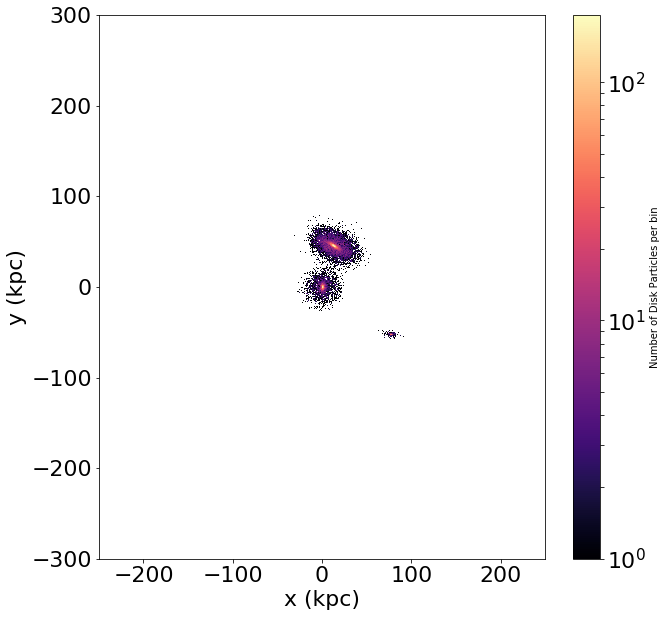

272


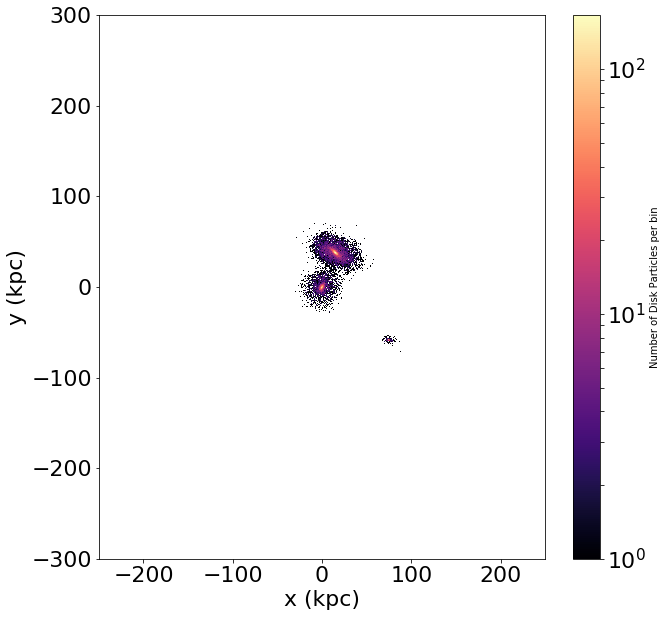

273


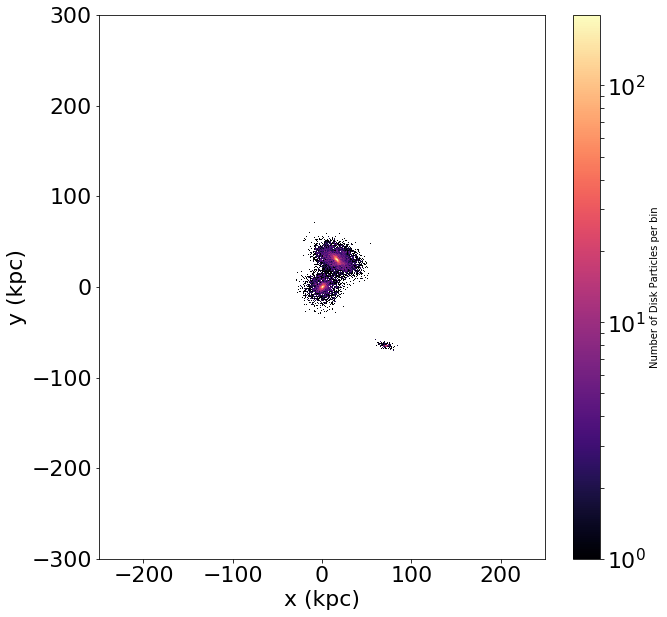

274


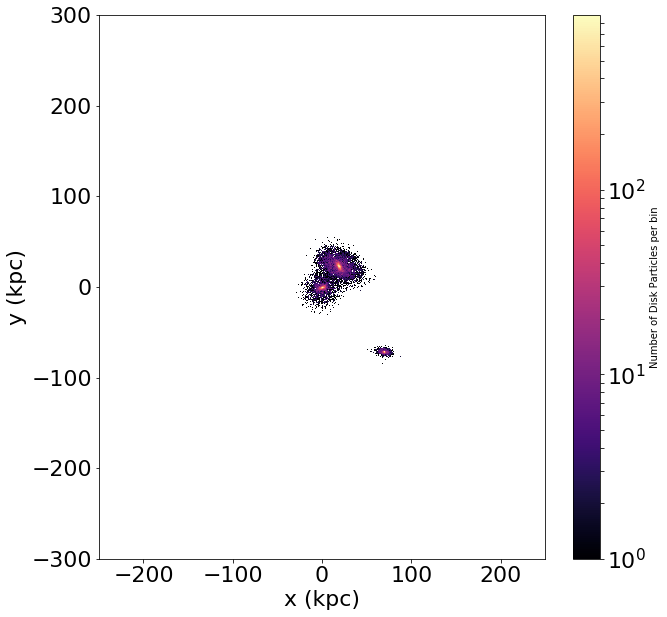

275


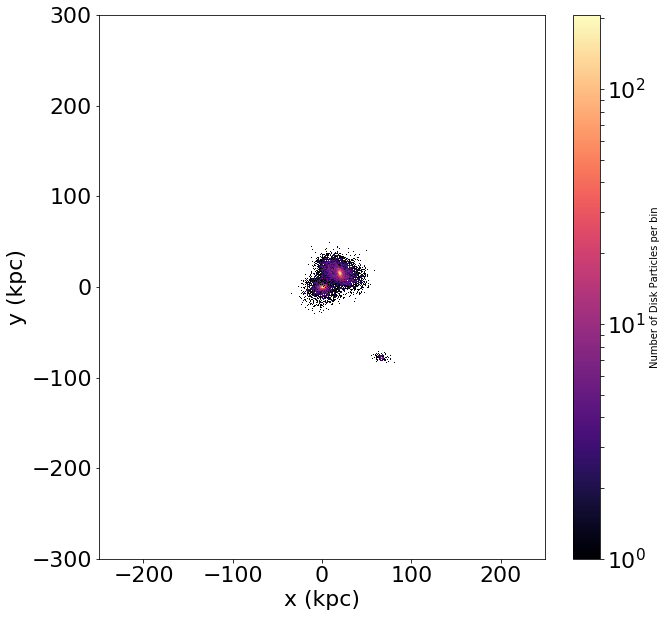

276


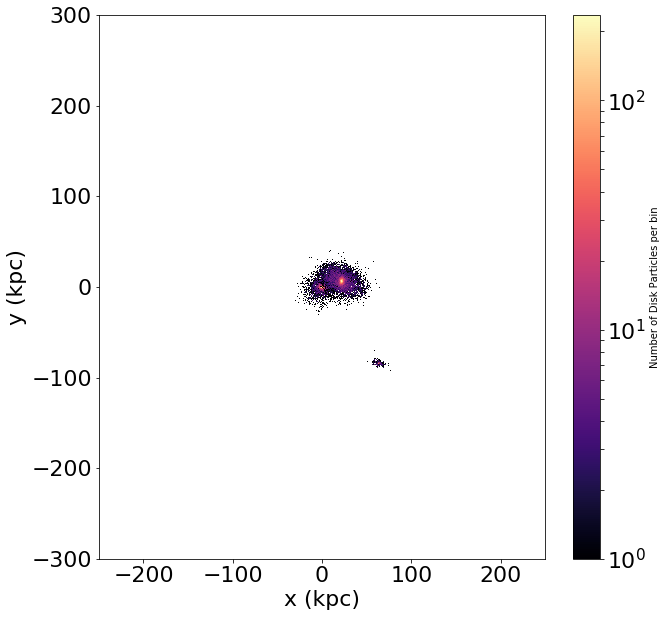

277


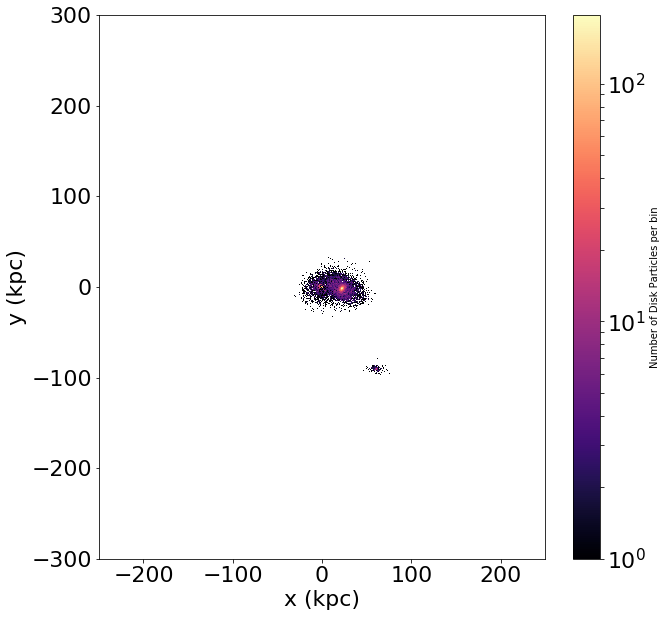

278


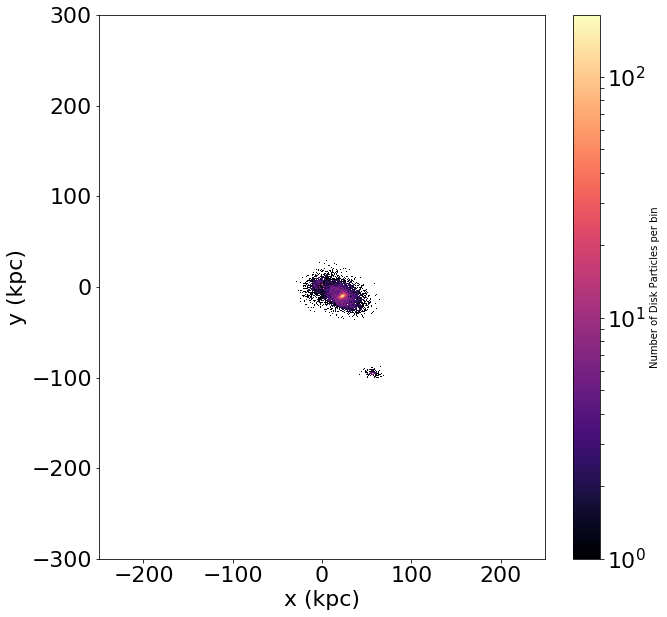

279


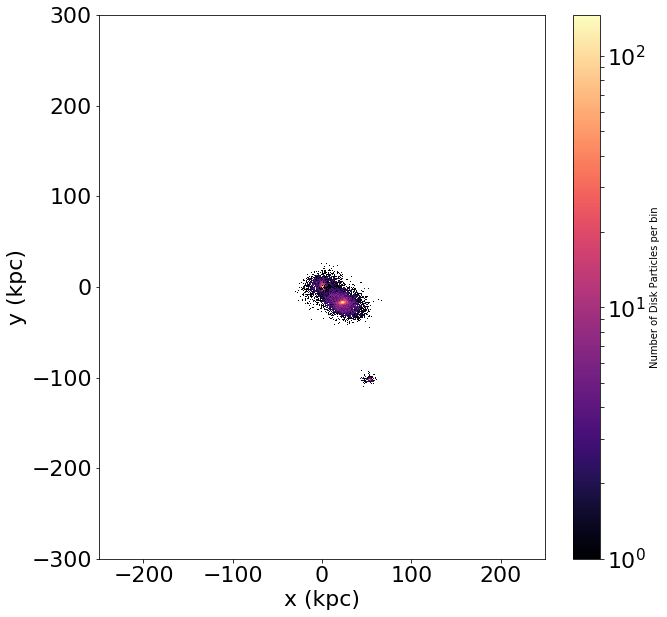

In [9]:

snap_ids=np.arange(265,280,1)
if len(snap_ids)==0:
    print("Ooops thats not valid")


# a for loop 
for i, snap_id in enumerate(snap_ids): # loop over files

    # compose the data filename (be careful about the folder)
    ilbl = '000'+ str(snap_id)
    ilbl = ilbl[-3:] #remove last three lines

    filenameMW= "%s_"%('MW') + ilbl + '.txt'
    filenameM31= "%s_"%('M31') + ilbl + '.txt'
    filenameM33= "%s_"%('M33') + ilbl + '.txt'
    
    # read data in the given file using Read
    time, total, data = Read(filenameMW)
    time, total, data = Read(filenameM31)  
    time, total, data = Read(filenameM33)  



    # Initialize an instance of CenterOfMass class, using disk particles

    COMMW=CenterOfMass(filenameMW,2)
    COMM31=CenterOfMass(filenameM31,2)
    COMM33=CenterOfMass(filenameM33,2)
    # Compute COM of the MW at the new position using disk particles
    COMPMW = COMMW.COM_P(0.1, 2)
    COMVMW= COMMW.COM_V(COMPMW[0],COMPMW[1],COMPMW[2])
    COMPM31 = COMM31.COM_P(0.1, 2)
    COMVM31= COMM31.COM_V(COMPM31[0],COMPM31[1],COMPM31[2])
    COMPM33 = COMM33.COM_P(0.1, 4)
    COMVM33= COMM33.COM_V(COMPM33[0],COMPM33[1],COMPM33[2])
    # Determine positions of disk particles relative to COM 
    MW_Disk_x = COMMW.x - COMPMW[0].value
    MW_Disk_y = COMMW.y - COMPMW[1].value
    M31_Disk_x = COMM31.x - COMPMW[0].value
    M31_Disk_y = COMM31.y - COMPMW[1].value
    M33_Disk_x = COMM33.x - COMPMW[0].value
    M33_Disk_y = COMM33.y - COMPMW[1].value
    # Also store the disk velocity in the y direction
    MW_Disk_vy = COMMW.vy - COMVMW[1].value
    M31_Disk_vy = COMM31.vy
    M33_Disk_vy = COMM33.vy
    
    
    
    
    
    fig, ax= plt.subplots(figsize=(10, 10))

    ## ADD HERE
    # plot the particle density for MW using plt.hist2d 
    # can modify bin number (e.g. bin =100 for low res files)
    print(snap_id)
    plt.hist2d(MW_Disk_x, MW_Disk_y, bins=200, norm=LogNorm(), cmap='magma')
    plt.hist2d(M31_Disk_x, M31_Disk_y, bins=200, norm=LogNorm(), cmap='magma')
    plt.hist2d(M33_Disk_x, M33_Disk_y, bins=200, norm=LogNorm(), cmap='magma')
    plt.colorbar(label='Number of Disk Particles per bin')
    # note: MW_Disk.x and MW_Disk.y won't be exactly at 0,0 because i was lazy and didn't take out the center of mass pos

    #### ADD HERE 
    # call density_contour to add contours
    # density_contour(x pos, y pos, contour res, contour res, axis, colors=[colors,colors])

    #density_contour(MW_Disk_x, MW_Disk_y, 80, 80, ax=ax, colors=['white'])
    #density_contour(M31_Disk_x, M31_Disk_y, 80, 80, ax=ax, colors=['white'])


    # Add axis labels
    plt.xlabel('x (kpc)', fontsize=22)
    plt.ylabel('y (kpc)', fontsize=22)
    
    if M31_Disk_x[i] < -200:
        #set axis limits
        plt.ylim(-100,700)
        plt.xlim(-550,100)
    else:
        plt.ylim(-300,300)
        plt.xlim(-250,250)

    #adjust tick label font size
    label_size = 22
    matplotlib.rcParams['xtick.labelsize'] = label_size 
    matplotlib.rcParams['ytick.labelsize'] = label_size
    plt.show()




# Choose snapshot 272

In [108]:
#choose snapshot from data above
snap=272
snapshot='000'+ str(snap)
snapshot = snapshot[-3:] #remove last three lines
filenameMW='MW_'+snapshot+'.txt'
filenameM31='M31_'+snapshot+'.txt'


#Jacobi radius at 272
Rj_snap=np.arange(0,22.98,0.01)

#instance for COM class
COMMW=CenterOfMass(filenameMW,2)
COMM31=CenterOfMass(filenameM31,2)

# Compute COM of the MW at the new position using disk particles
COMPMW = COMMW.COM_P(0.1, 2)
COMPM31 = COMM31.COM_P(0.1, 2) 


#calculate the R vector of the COM's
RMW = np.sqrt(COMPMW[0]**2+COMPMW[1]**2+COMPMW[2]**2)
RM31= np.sqrt(COMPM31[0]**2+COMPM31[1]**2+COMPM31[2]**2)



#Instance for MassProfile
MW=MassProfile('MW',snapshot)
M31=MassProfile('M31',snapshot)

#Mass enclosed at Jacobi radius
MW_Encl=MW.MassEnclosed(2,Rj_snap)
M31_Encl=M31.MassEnclosed(2,Rj_snap)

R_Dist= RM31-RMW

print(MW_Encl[len(MW_Encl)-1])
print(RMW)

73566000000.00002 solMass
216.70485619847102 kpc


In [110]:
#calculate x,y,z comp for every particle
MWx = COMMW.x - COMPMW[0].value
MWy = COMMW.y - COMPMW[1].value
MWz = COMMW.z - COMPMW[2].value
M31x = COMM31.x - COMPMW[0].value
M31y = COMM31.y - COMPMW[1].value
M31z = COMMW.z - COMPMW[2].value

#calculate the r vector from the MW COM
RMW=np.sqrt(MWx**2+MWy**2+MWz**2)

#create an index choosing the particles outside the jacobi radius
index=np.where(RMW > Rj_snap[len(Rj_snap)-1])

#store the particles greater than jacobi radius
Radiusgreater=RMW[index]
print('Done!')

Done!


In [111]:
#see how many particles are selected
len(Radiusgreater)

717

290


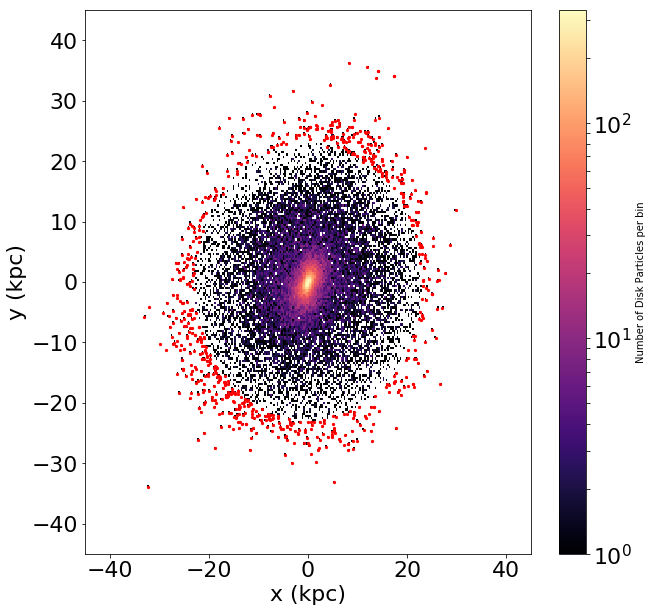

In [112]:
#plot the snapshot with the particles over layed
fig, ax= plt.subplots(figsize=(10, 10))

# plot the particle density for MW using plt.hist2d 
# can modify bin number (e.g. bin =100 for low res files)
print(snap_id)
plt.hist2d(MWx, MWy, bins=200, norm=LogNorm(), cmap='magma')
plt.colorbar(label='Number of Disk Particles per bin')

#overlay selected particles on plot
plt.scatter(MWx[index], MWy[index], s=5, color='red')

# call density_contour to add contours
# density_contour(x pos, y pos, contour res, contour res, axis, colors=[colors,colors])

#density_contour(MW_Disk_x, MW_Disk_y, 80, 80, ax=ax, colors=['white'])
#density_contour(M31_Disk_x, M31_Disk_y, 80, 80, ax=ax, colors=['white'])


# Add axis labels
plt.xlabel('x (kpc)', fontsize=22)
plt.ylabel('y (kpc)', fontsize=22)


plt.ylim(-45,45)
plt.xlim(-45,45)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
plt.show()

# Some snapshot Later 

In [113]:
#pick a later snapshot

snap_later=300
snapshot_later='000'+ str(snap_later)
snapshot_later = snapshot_later[-3:] #remove last three lines
filenameMW_later='MW_'+snapshot_later+'.txt'
filenameM31_later='M31_'+snapshot_later+'.txt'

#COM instance
COMMW_later=CenterOfMass(filenameMW_later,2)
COMM31_later=CenterOfMass(filenameM31_later,2)

# Compute COM of the MW at the new position using disk particles
COMPMW_later = COMMW_later.COM_P(0.1, 2)
COMPM31_later = COMM31_later.COM_P(0.1, 2) 

#calculate each partciles postion relative to COM
MWx_later = COMMW_later.x - COMPMW_later[0].value
MWy_later = COMMW_later.y - COMPMW_later[1].value
MWz_later = COMMW_later.z - COMPMW_later[2].value
M31x_later = COMM31_later.x - COMPMW_later[0].value
M31y_later = COMM31_later.y - COMPMW_later[1].value
M31z_later = COMMW_later.z - COMPMW_later[2].value

#prove we are at diff snapshot
print(filenameMW_later)


MW_300.txt


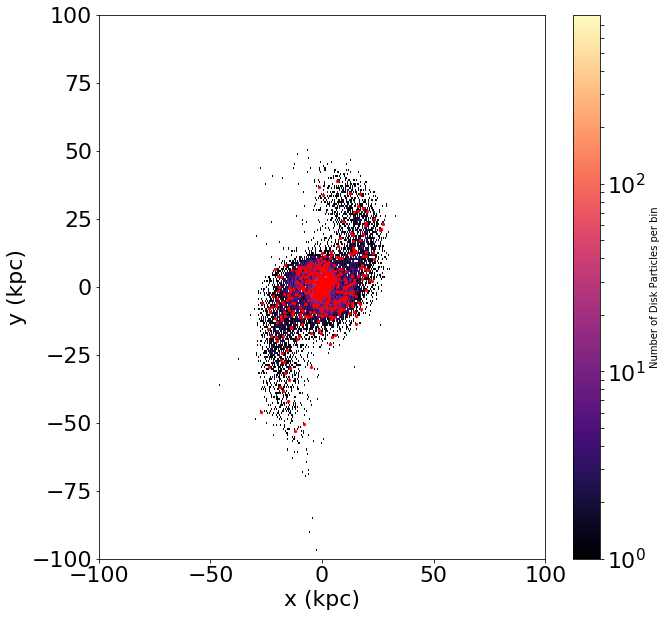

In [114]:
#plot new snapshot with same particle with index from before overlayed
fig, ax= plt.subplots(figsize=(10, 10))

# plot the particle density for MW using plt.hist2d 
# can modify bin number (e.g. bin =100 for low res files)
plt.hist2d(MWx_later, MWy_later, bins=200, norm=LogNorm(), cmap='magma')
plt.colorbar(label='Number of Disk Particles per bin')
# note: MW_Disk.x and MW_Disk.y won't be exactly at 0,0 because i was lazy and didn't take out the center of mass pos

plt.scatter(MWx_later[index], MWy_later[index], s=5, color='red')

# call density_contour to add contours
# density_contour(x pos, y pos, contour res, contour res, axis, colors=[colors,colors])

#density_contour(MW_Disk_x, MW_Disk_y, 80, 80, ax=ax, colors=['white'])
#density_contour(M31_Disk_x, M31_Disk_y, 80, 80, ax=ax, colors=['white'])


# Add axis labels
plt.xlabel('x (kpc)', fontsize=22)
plt.ylabel('y (kpc)', fontsize=22)


plt.ylim(-100,100)
plt.xlim(-100,100)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
plt.show()